In [1]:
train_DIR='train_folder'
validation_DIR='validation_folder'
test_DIR='test_folder'
train_res_DIR='train_results'
test_rese_DIR='test_results'

In [2]:
from xml.dom import minidom

# parse an xml file by name
mydoc = minidom.parse('MoNuSegTrainingData/Annotations/TCGA-38-6178-01Z-00-DX1.xml')

Regions = mydoc.getElementsByTagName('Region')

In [3]:
import numpy as np
xy=[]
for index,region in enumerate(Regions):
  vertices=region.getElementsByTagName('Vertex')
  xy.append([(float(vertex.getAttribute('X')),float(vertex.getAttribute('Y'))) for i,vertex in enumerate(vertices)])

In [4]:
from PIL import Image,ImageDraw
img=np.array(Image.open('MoNuSegTrainingData/Tissue Images/TCGA-38-6178-01Z-00-DX1.tif'))
img.shape

(1000, 1000, 3)

In [5]:
img = Image.new('L', (1000, 1000), 0)
for i in xy:
  ImageDraw.Draw(img).polygon(i, outline=1, fill=1)

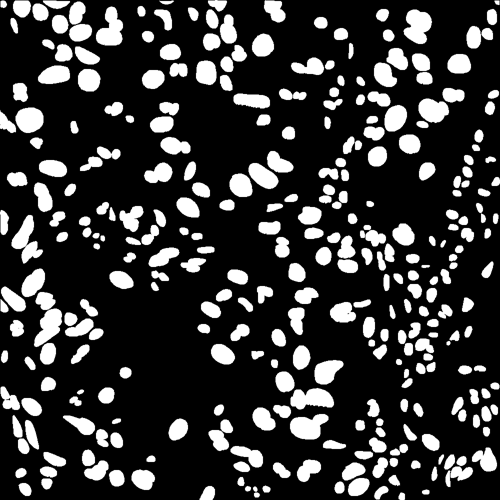

In [6]:
Image.fromarray(255*np.array(img)).resize((500,500))#.save('mask.png')

In [7]:
from shutil import copyfile
import matplotlib.pyplot as plt
%matplotlib inline

def get_polygons(x):
  mydoc = minidom.parse(x)
  Regions = mydoc.getElementsByTagName('Region')
  xy=[]
  for index,region in enumerate(Regions):
    vertices=region.getElementsByTagName('Vertex')
    xy.append([(float(vertex.getAttribute('X')),float(vertex.getAttribute('Y'))) for i,vertex in enumerate(vertices)])
  return xy

def get_masks(x):
  xy=get_polygons(x)
  img = Image.new('L', (1000, 1000), 0)
  for i in xy:
    ImageDraw.Draw(img).polygon(i, outline=1, fill=1)
  return Image.fromarray(255*np.array(img))



def save_datapoint(x,folder,name):
  label=get_masks('MoNuSegTrainingData/Annotations/'+x)
  image=Image.open('MoNuSegTrainingData/Tissue Images/'+x.replace('xml','tif'))
  image=image.resize((128,128))
  label=label.resize((128,128))
  
  plt.subplot(1,2,1)
  plt.imshow(image,interpolation='none')
  plt.subplot(1,2,2)
  plt.imshow(label,cmap='gray',interpolation='none')
  plt.show()
  print(np.array(image).shape,' ',np.array(label).shape)
  image.save(folder+'/img/'+name.zfill(4)+'.png')
  label.save(folder+'/labelcol/'+name.zfill(4)+'.png')

In [8]:
!rm -rf test_folder
!rm -rf train_folder_folder
!rm -rf validation_folder
!rm -rf train_results
!rm -rf test_results

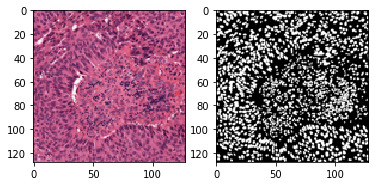

(128, 128, 3)   (128, 128)


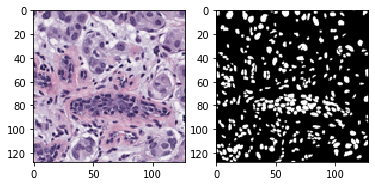

(128, 128, 3)   (128, 128)


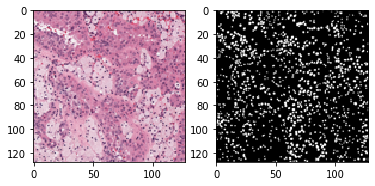

(128, 128, 3)   (128, 128)


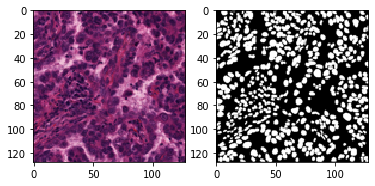

(128, 128, 3)   (128, 128)


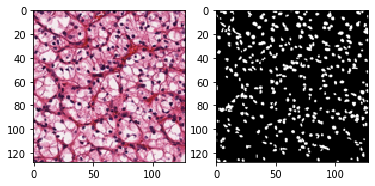

(128, 128, 3)   (128, 128)


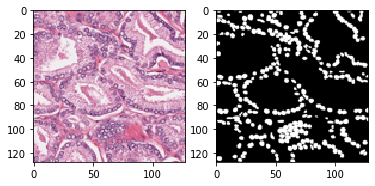

(128, 128, 3)   (128, 128)


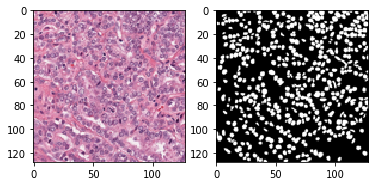

(128, 128, 3)   (128, 128)


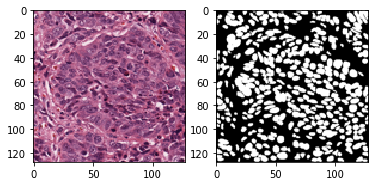

(128, 128, 3)   (128, 128)


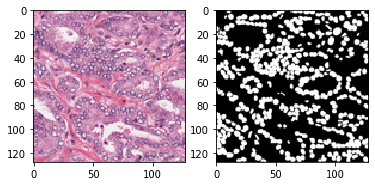

(128, 128, 3)   (128, 128)


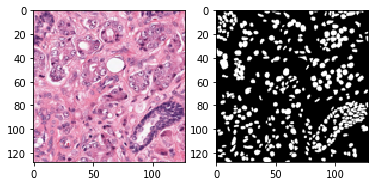

(128, 128, 3)   (128, 128)


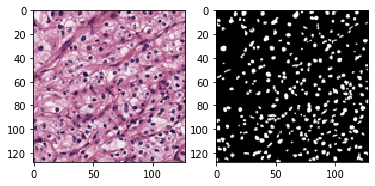

(128, 128, 3)   (128, 128)


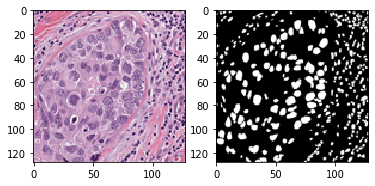

(128, 128, 3)   (128, 128)


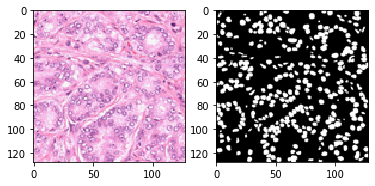

(128, 128, 3)   (128, 128)


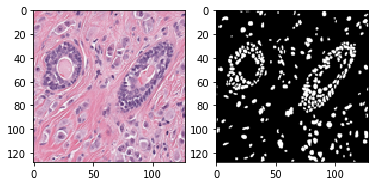

(128, 128, 3)   (128, 128)


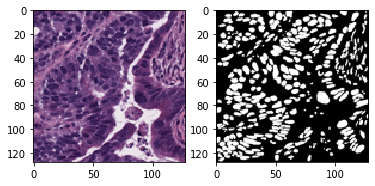

(128, 128, 3)   (128, 128)


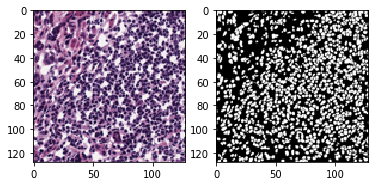

(128, 128, 3)   (128, 128)


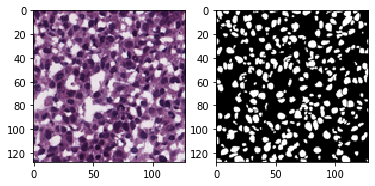

(128, 128, 3)   (128, 128)


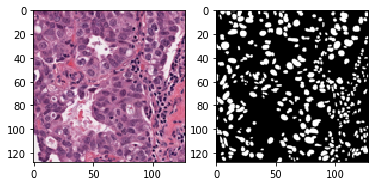

(128, 128, 3)   (128, 128)


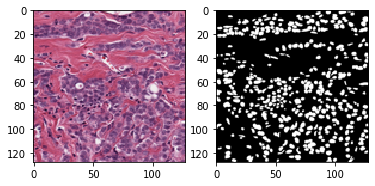

(128, 128, 3)   (128, 128)


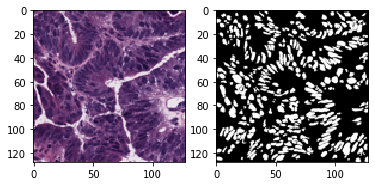

(128, 128, 3)   (128, 128)


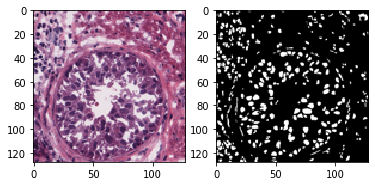

(128, 128, 3)   (128, 128)


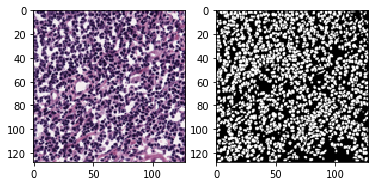

(128, 128, 3)   (128, 128)


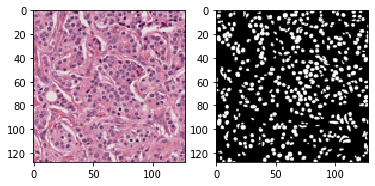

(128, 128, 3)   (128, 128)


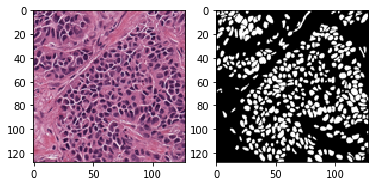

(128, 128, 3)   (128, 128)


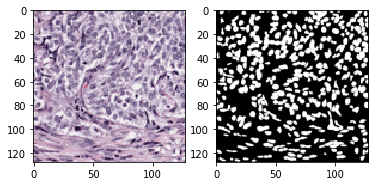

(128, 128, 3)   (128, 128)


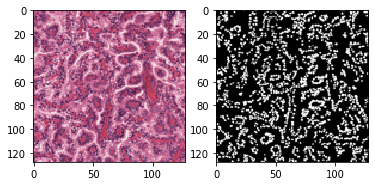

(128, 128, 3)   (128, 128)


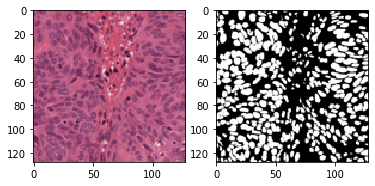

(128, 128, 3)   (128, 128)


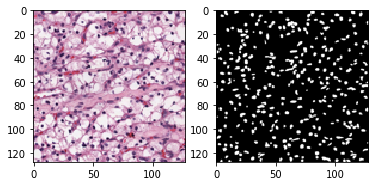

(128, 128, 3)   (128, 128)


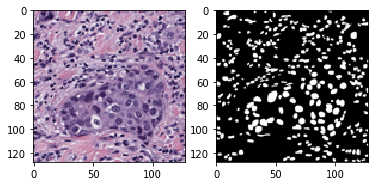

(128, 128, 3)   (128, 128)


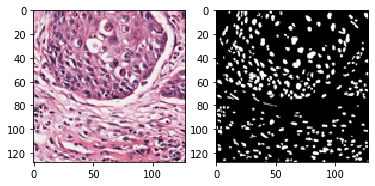

(128, 128, 3)   (128, 128)


In [9]:
import random
import itertools
import os

for i,j in itertools.product(['train_folder/',
                              'validation_folder/',
                              'test_folder/'],
                             ['img',
                              'labelcol']):
  os.makedirs(i+j,exist_ok=True)
random.random()



v,t = 0,0
a, b, filenames = next(os.walk('MoNuSegTrainingData/Annotations'))
for i in filenames:
  if random.random()<=0.167:
    v+=1
    save_datapoint(i,'validation_folder',str(v))
  else:
    t+=1
    save_datapoint(i,'train_folder',str(t))

In [17]:
command="python3 ../train.py \
 --train_dataset \"{}\" \
 --val_dataset \"{}\" \
 --direc '{}' \
 --batch_size 4 \
 --epoch 400 \
 --save_freq 10 \
 --modelname \"MedT\" \
 --learning_rate 0.001 \
 --imgsize 128 \
 --gray \"no\" \
".format(train_DIR,validation_DIR,train_res_DIR)

!{command}

Total_params: 1560116
/home/passlab/.local/lib/python3.6/site-packages/torch/nn/functional.py:3613: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
epoch [0/400], loss:0.5846
epoch [1/400], loss:0.5551
epoch [2/400], loss:0.5342
epoch [3/400], loss:0.5155
epoch [4/400], loss:0.5149
epoch [5/400], loss:0.4908
epoch [6/400], loss:0.4795
epoch [7/400], loss:0.4640
epoch [8/400], loss:0.4566
epoch [9/400], loss:0.4479
epoch [10/400], loss:0.4498
epoch [11/400], loss:0.4209
epoch [12/400], loss:0.4243
epoch [13/400], loss:0.3979
epoch [14/400], loss:0.3911
epoch [15/400], loss:0.3932
epoch [16/400], loss:0.3864
epoch [17/400], loss:0.3717
epoch [18/400], loss:0.3769
epoch [19/400], loss:0.3679
epoch [20/400], loss:0.3632
epoch [21/400], loss:0.3553
epoc

epoch [273/400], loss:0.1268
epoch [274/400], loss:0.1213
epoch [275/400], loss:0.1163
epoch [276/400], loss:0.1140
epoch [277/400], loss:0.1115
epoch [278/400], loss:0.1091
epoch [279/400], loss:0.1163
epoch [280/400], loss:0.1091
epoch [281/400], loss:0.1053
epoch [282/400], loss:0.1050
epoch [283/400], loss:0.1069
epoch [284/400], loss:0.1065
epoch [285/400], loss:0.1030
epoch [286/400], loss:0.1075
epoch [287/400], loss:0.1068
epoch [288/400], loss:0.1049
epoch [289/400], loss:0.1085
epoch [290/400], loss:0.1135
epoch [291/400], loss:0.1207
epoch [292/400], loss:0.1202
epoch [293/400], loss:0.1252
epoch [294/400], loss:0.1491
epoch [295/400], loss:0.1306
epoch [296/400], loss:0.1255
epoch [297/400], loss:0.1142
epoch [298/400], loss:0.1058
epoch [299/400], loss:0.0994
epoch [300/400], loss:0.0945
epoch [301/400], loss:0.0925
epoch [302/400], loss:0.0925
epoch [303/400], loss:0.0878
epoch [304/400], loss:0.0879
epoch [305/400], loss:0.0923
epoch [306/400], loss:0.0962
epoch [307/400

In [18]:
def save_datapoint(x,folder,name):
  label=get_masks('MoNuSegTestData/'+x)
  image=Image.open('MoNuSegTestData/'+x.replace('xml','tif'))
  image=image.resize((128,128))
  label=label.resize((128,128))
  
  plt.subplot(1,2,1)
  plt.imshow(image,interpolation='none')
  plt.subplot(1,2,2)
  plt.imshow(label,cmap='gray',interpolation='none')
  plt.show()
  print(np.array(image).shape,' ',np.array(label).shape)
  image.save(folder+'/img/'+name.zfill(4)+'.png')
  label.save(folder+'/labelcol/'+name.zfill(4)+'.png')

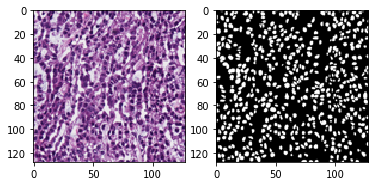

(128, 128, 3)   (128, 128)


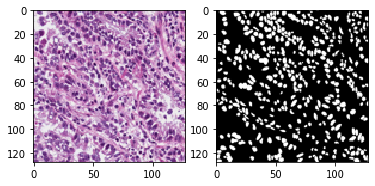

(128, 128, 3)   (128, 128)


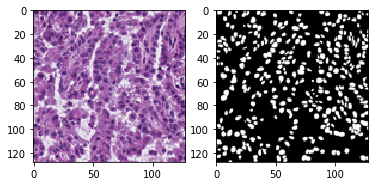

(128, 128, 3)   (128, 128)


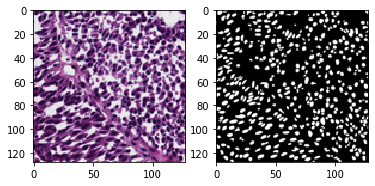

(128, 128, 3)   (128, 128)


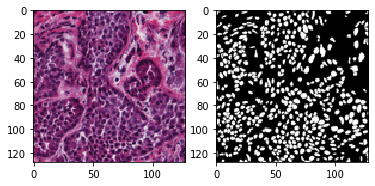

(128, 128, 3)   (128, 128)


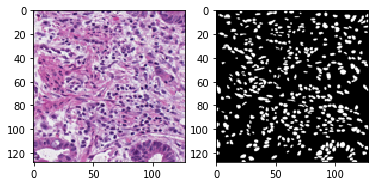

(128, 128, 3)   (128, 128)


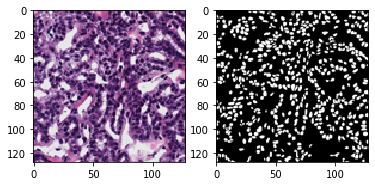

(128, 128, 3)   (128, 128)


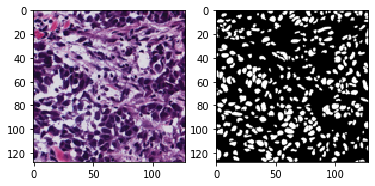

(128, 128, 3)   (128, 128)


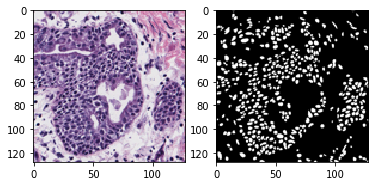

(128, 128, 3)   (128, 128)


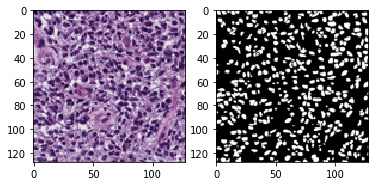

(128, 128, 3)   (128, 128)


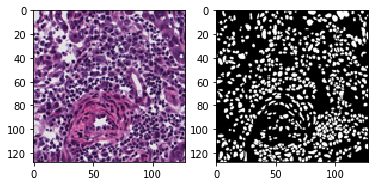

(128, 128, 3)   (128, 128)


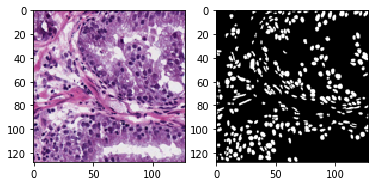

(128, 128, 3)   (128, 128)


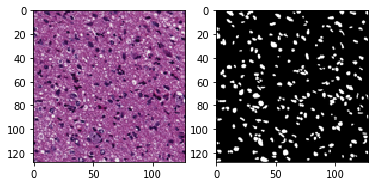

(128, 128, 3)   (128, 128)


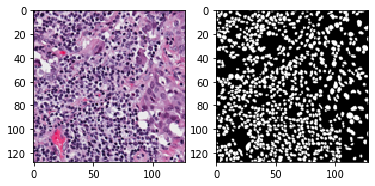

(128, 128, 3)   (128, 128)


In [19]:
c=0
for i in os.listdir('MoNuSegTestData/'):
  if i.endswith('xml'):
    c+=1
    save_datapoint(i,'test_folder',str(c))